# Исследование объявлений о продаже квартир

В моем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') 
data 


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

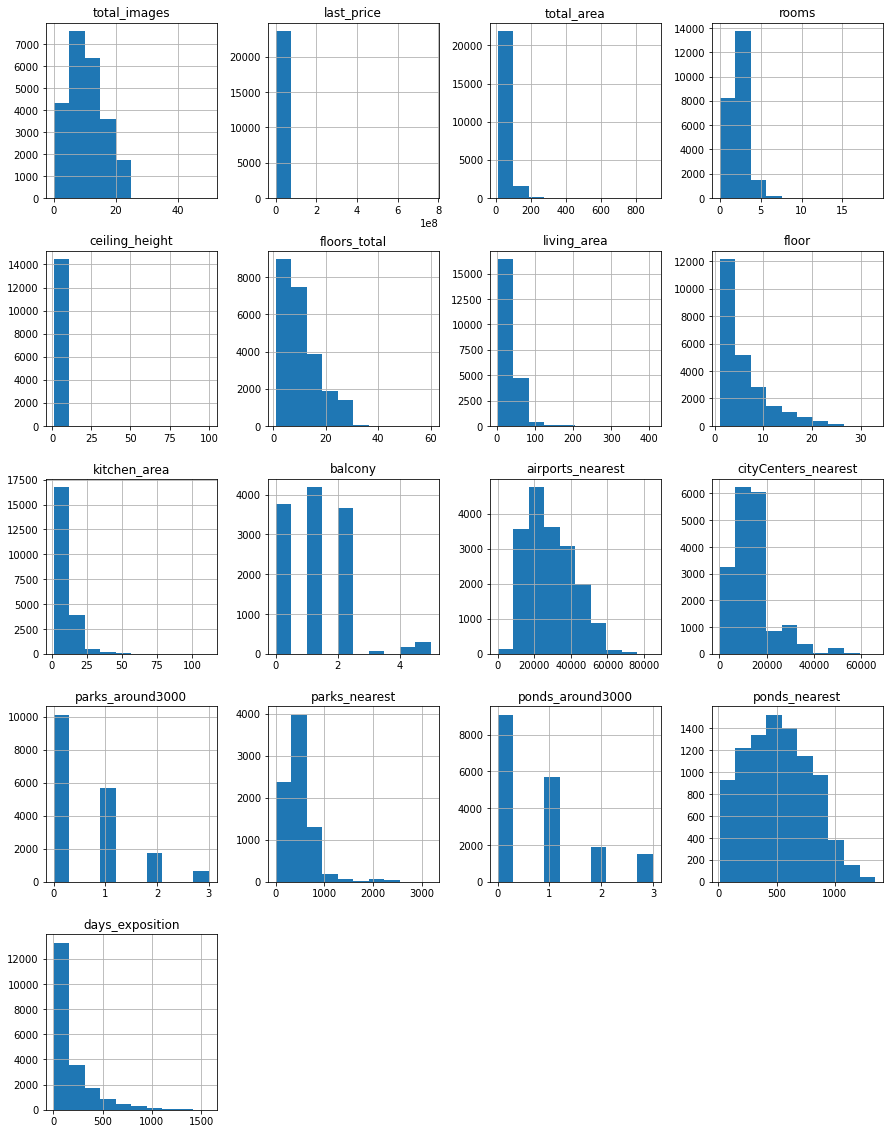

In [3]:
data.hist(figsize=(15, 20)); 

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Вывод: Для корректного отображения информации в датафрейме необходио добавить разделитель. В дата фрейме есть пропущенные значения, неверный тип данных и аномальные значения.

### Предобработка данных

In [5]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


In [6]:
import warnings
warnings.filterwarnings('ignore')

for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) & (data['locality_name'] == locality_name), 'ceiling_height'] = median
#Остаток заполняем медианой
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = data['ceiling_height'].median()


Заменили пропуски средней высотой потолка по районам, а оставшиеся медианой.

In [7]:
data['living_area']=data['living_area'].astype('float')  #меняем тип данных на вещественный для living_area 


In [8]:
data['last_price']=data['last_price'].astype('float') #меняем тип данных на вещественный для last_price

In [9]:
living_ratio = data['living_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)

In [10]:
data['balcony']=data['balcony'].fillna(0) # заполняем пропуски балкона 0- нет балкона

data['balcony']=data['balcony'].astype('int') #меняем тип на целочисленный

In [11]:
data['is_apartment']=data['is_apartment'].astype('bool') # переводим в бул
data['is_apartment']=data['is_apartment'].fillna(0) #заполняем 0-не аппартамент

In [12]:
data['airports_nearest']=data['airports_nearest'].astype('float')
grouped_airpots_nearest=data.groupby('locality_name')['airports_nearest'].transform('mean') 
#data['airports_nearest'].isnull().sum()
data['airports_nearest'].fillna(grouped_airpots_nearest,inplace=True)#заполняем пропуски расстояния до аэропорта по среднемму значению расстояния в зависимости от района.
#data['airports_nearest'].isnull().sum()
data['airports_nearest']=data['airports_nearest'].fillna(data['airports_nearest'].mean()) #где остались пропуски расстояния до аэропорта  заполняем просто по среднемму значению расстояния 
#data['airports_nearest'].isnull().sum()

In [13]:
data['cityCenters_nearest']=data['cityCenters_nearest'].astype('float')
for locality_name in data['locality_name'].unique():
    median = data.loc[data['locality_name'] == locality_name, 'cityCenters_nearest'].median()
    data.loc[(data['cityCenters_nearest'].isna()) & (data['locality_name'] == locality_name), 'cityCenters_nearest'] = median

In [14]:
data['parks_around3000']=data['parks_around3000'].astype('float') # Меняем тип
data['parks_around3000']=data['parks_around3000'].fillna(data['parks_around3000'].mean())#заполняем средним
data['parks_around3000']=data['parks_around3000'].astype('int') # Меняем тип

In [15]:
data['parks_nearest']=data['parks_nearest'].astype('float') # Меняем тип
data['parks_nearest']=data['parks_nearest'].fillna(data['parks_nearest'].mean())#заполняем средним

In [16]:
data['ponds_around3000']=data['ponds_around3000'].astype('float') # Меняем тип
data['ponds_around3000']=data['ponds_around3000'].fillna(data['ponds_around3000'].mean())#заполняем средним
data['ponds_around3000']=data['ponds_around3000'].astype('int') # Меняем тип

In [17]:
data['ponds_nearest']=data['ponds_nearest'].astype('float') # Меняем тип
data['ponds_nearest']=data['ponds_nearest'].fillna(data['ponds_nearest'].mean())#заполняем средним

In [18]:
data['floors_total']=data.fillna(data['floors_total'].mean())#заполняем средним
data['floors_total']=data['floors_total'].astype('int') # Меняем тип

In [19]:
data['days_exposition']=data['days_exposition'].astype('float') # Меняем тип
data['days_exposition']=data['days_exposition'].fillna(data['days_exposition'].median()) #Заполняем средним
data['days_exposition']=data['days_exposition'].astype('int')# Меняем тип

In [20]:
data['kitchen_area']=data['kitchen_area'].astype('float') # Меняем тип
data['kitchen_area']=data['kitchen_area'].fillna(data['kitchen_area'].median())#заполняем средним

In [21]:
data['total_area']=data['total_area'].astype('float')# Меняем тип

In [22]:
data['price_for_m2']=data['last_price']/data['living_area'] # Добавляем столбец с ценой за квадратный метр 

In [23]:
grouped_price=data.groupby('locality_name')['price_for_m2'].transform('mean') # группируем по району
nan=data.groupby('locality_name')['price_for_m2'].mean()
nan.sort_values()

locality_name
деревня Малая Романовка              14808.362369
деревня Старополье                   18523.657980
деревня Выскатка                     18856.907895
посёлок станции Свирь                18973.070562
деревня Вахнова Кара                 20470.626958
                                        ...      
Кудрово                             206563.773766
Санкт-Петербург                     215086.621355
Зеленогорск                         218860.191692
посёлок Лисий Нос                   220102.839897
садовое товарищество Новая Ропша    250000.000000
Name: price_for_m2, Length: 364, dtype: float64

In [24]:
data['price_for_m2'].fillna(grouped_price,inplace=True)

In [25]:
data.dropna(subset=['price_for_m2'],inplace=True) # удаляем если остались  nan

In [26]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,0.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  int64  
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [28]:
data.duplicated().sum()

0

Дубликатов нет

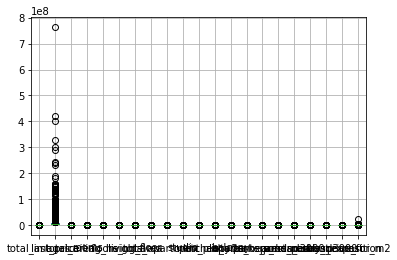

In [29]:
data.boxplot();

(0.0, 15000000.0)

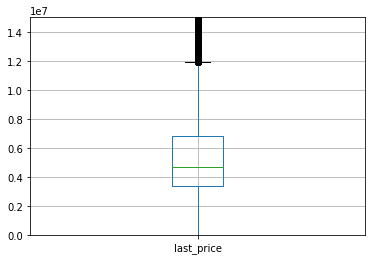

In [30]:
data.boxplot('last_price')
plt.ylim(0, 15000000)

In [31]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,18305.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,2.369900e+04
mean,9.858475,6.541549e+06,60.348651,2.070636,2.733877,9.858475,34.594076,5.892358,10.428526,0.591080,28869.811212,14231.683201,0.469049,490.804555,0.590911,517.980900,169.360226,1.863024e+05
std,5.682529,1.088701e+07,35.654083,1.078405,1.009388,5.682529,22.354668,4.885249,5.631126,0.959298,11137.844870,8625.989235,0.748534,199.859965,0.883999,172.181967,206.535633,1.808136e+05
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,3.809375e+02
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,6.000000,19.000000,2.000000,7.400000,0.000000,21176.000000,9274.000000,0.000000,490.804555,0.000000,517.980900,45.000000,1.268455e+05
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.100000,0.000000,28869.811212,13101.000000,0.000000,490.804555,0.000000,517.980900,95.000000,1.677215e+05
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,14.000000,42.100000,8.000000,11.440000,1.000000,34496.500000,16326.000000,1.000000,490.804555,1.000000,517.980900,199.000000,2.200000e+05
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,50.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,2.166333e+07


Можно предположить, что все аномалии в рамках нормы(Например, частный дом, в нем много комнат и большая площадь. Большая площадь кухни - это обединенная кухня с гостинной и т.п.). Смущает лишь высота потолков, минимальная 1 метр и максимальная 100 метров. Так не бывает. Надо исправить.

In [32]:
min_height = 2
max_height = 4
data = data.query('@min_height < ceiling_height < @max_height')
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_m2
count,23567.000000,2.356700e+04,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,18204.000000,23567.000000,23567.000000,23567.000000,23567.000000,23567.000000,2.356700e+04
mean,9.850766,6.473272e+06,60.100087,2.067085,2.698645,9.850766,34.423606,5.900412,10.405779,0.591293,28879.624229,14264.942705,0.466967,490.909112,0.588365,518.152269,169.092035,1.860198e+05
std,5.670985,1.068072e+07,34.893588,1.074279,0.202593,5.670985,21.833047,4.889534,5.572361,0.959003,11150.533283,8611.931862,0.746204,200.027931,0.881499,172.072162,206.271016,1.807752e+05
min,0.000000,1.219000e+04,12.000000,0.000000,2.200000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,3.809375e+02
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,6.000000,19.000000,2.000000,7.300000,0.000000,21136.500000,9358.250000,0.000000,490.804555,0.000000,517.980900,45.000000,1.268293e+05
50%,9.000000,4.630000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.100000,0.000000,28869.811212,13123.000000,0.000000,490.804555,0.000000,517.980900,95.000000,1.675958e+05
75%,14.000000,6.750000e+06,69.515000,3.000000,2.700000,14.000000,42.000000,8.000000,11.400000,1.000000,34530.000000,16357.000000,1.000000,490.804555,1.000000,517.980900,198.000000,2.200000e+05
max,50.000000,7.630000e+08,900.000000,19.000000,3.980000,50.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,2.166333e+07


Убрали аномально малинькие высоты потолка и аномально большие.

In [33]:
#data['locality_name'].unique()
data['locality_name'] = data['locality_name'].replace('поселок Пансионат Зелёный Бор', 'посёлок Пансионат Зелёный Бор')
data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Вывод: В предобработке данных мы привели значения столбцов к верному. Исправили пропуски. Провели поиск дубликатов и аномалий.

### Посчитайте и добавьте в таблицу новые столбцы

In [34]:
# Функция категоризации этажей
def floor_group(row):
    what_floor=row['floor']
    total_floor=row['floors_total']
    if what_floor==1:
        return 'Первый этаж'
    if what_floor==total_floor:
        return 'Последний этаж'
    return 'Другой этаж'

floor_position=data.apply(floor_group,axis=1) #заливка дата сета через apply и функцию
data['Floor_position']=floor_position # новый столбец
 


In [35]:
data['first_day_exposition'] = data['first_day_exposition'].astype('datetime64[M]')

data['week_day']=data['first_day_exposition'].dt.weekday #создаю столбец с днем недели
data['month']=data['first_day_exposition'].dt.month #создаю столбец с месяцем
data['year']=data['first_day_exposition'].dt.year #создаю столбец с годом

In [36]:
data['living_area/total_area']=data['living_area']/data['total_area'] #  отношение  жилой к общей площади

In [37]:
data['kitchen_area/living_area']=data['kitchen_area']/data['living_area'] #отношение площади кухни к жилой площади
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_m2,Floor_position,week_day,month,year,living_area/total_area,kitchen_area/living_area
0,20,13000000.0,108.0,2019-03-01,3,2.70,20,51.000000,8,True,...,2,755.0000,95,254901.960784,Другой этаж,4,3,2019,0.472222,0.490196
1,7,3350000.0,40.4,2018-12-01,1,2.63,7,18.600000,1,True,...,0,517.9809,81,180107.526882,Первый этаж,5,12,2018,0.460396,0.591398
2,10,5196000.0,56.0,2015-08-01,2,2.70,10,34.300000,4,True,...,2,574.0000,558,151486.880466,Другой этаж,5,8,2015,0.612500,0.241983
3,0,64900000.0,159.0,2015-07-01,3,2.70,0,90.785766,9,True,...,3,234.0000,424,714869.770085,Другой этаж,2,7,2015,0.570980,0.100236
4,2,10000000.0,100.0,2018-06-01,2,3.03,2,32.000000,13,True,...,1,48.0000,121,312500.000000,Другой этаж,4,6,2018,0.320000,1.281250


In [38]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000

data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(value=0).astype(int)

data.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 23567 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   total_images              23567 non-null  int64         
 1   last_price                23567 non-null  float64       
 2   total_area                23567 non-null  float64       
 3   first_day_exposition      23567 non-null  datetime64[ns]
 4   rooms                     23567 non-null  int64         
 5   ceiling_height            23567 non-null  float64       
 6   floors_total              23567 non-null  int64         
 7   living_area               23567 non-null  float64       
 8   floor                     23567 non-null  int64         
 9   is_apartment              23567 non-null  bool          
 10  studio                    23567 non-null  bool          
 11  open_plan                 23567 non-null  bool          
 12  kitchen_area      

Добавили необходимые столбцы.

### Проведите исследовательский анализ данных

<AxesSubplot:>

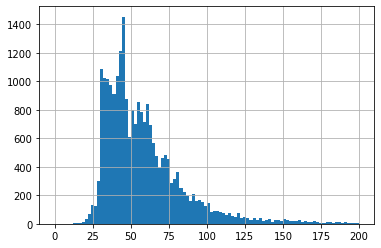

In [39]:
data['total_area'].hist(bins=100,range=(0,200))

Оснвнаяя маса продаж приходится на площадь 46-49 кв. м.

<AxesSubplot:>

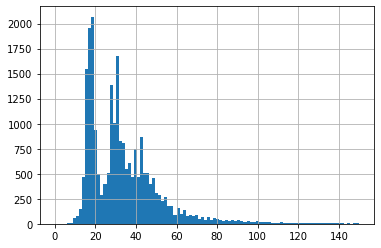

In [40]:
data['living_area'].hist(bins=100,range=(0,150))

Видим два пика примерно 19 и 30 кв метров (можно предположить, что студия и однокомнатная). А так массово продаются квартиры с жилой площадью 25-48 кв. м.

<AxesSubplot:>

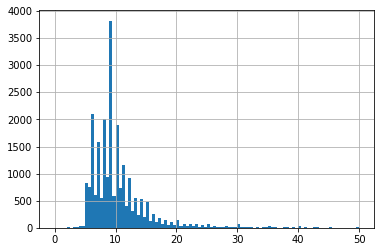

In [41]:
data['kitchen_area'].hist(bins=100,range=(0,50))

Подавляющее большинство квартир продается с площадью 7-8 кв м, так как большинство советских планировок имели именно такие кухни.

<AxesSubplot:>

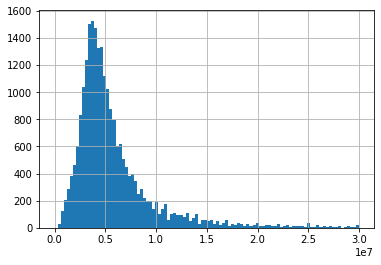

In [42]:
data['last_price'].hist(bins=100,range=(0,30000000))

Больше всего квартир продается за 3-4 млн. руб

<AxesSubplot:>

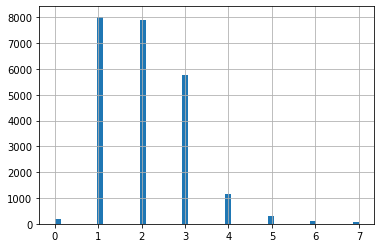

In [43]:
data['rooms'].hist(bins=50,range=(0,7))

Больше всего продаются 1-2 комнатные квартиры, чуть меньше трехкомнатные. Квартиры с большим колмчеством комнат продлаются меньше.

<AxesSubplot:>

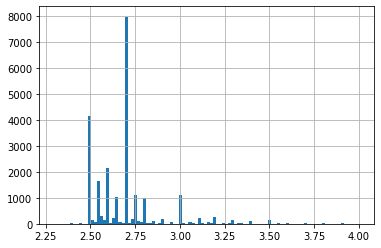

In [44]:
data['ceiling_height'].hist(bins=100,range=(2.3,4))

Подавляющее большинство квартир продается с потолком 2,65м.

<AxesSubplot:>

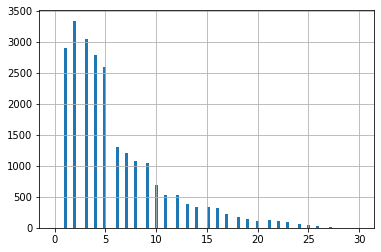

In [45]:
data['floor'].hist(bins=100,range=(0, 30))

Основная масса квартир продается на 2-5 этажах.

<AxesSubplot:>

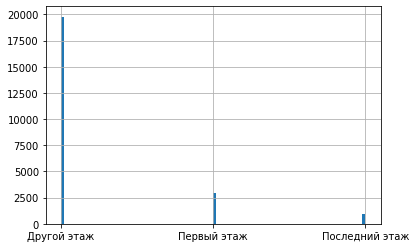

In [46]:
data['Floor_position'].hist(bins=100)

Меньше всего покупают на последнем этаже, а подавляющее большинство на Другом (не первом и не последнем).

<AxesSubplot:>

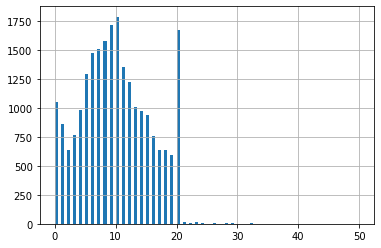

In [47]:
data['floors_total'].hist(bins=100)

Основные продажи идут 5-17 этажные дома (предположительно старый жилой фонд) и 20 этажные (новостройки).

<AxesSubplot:>

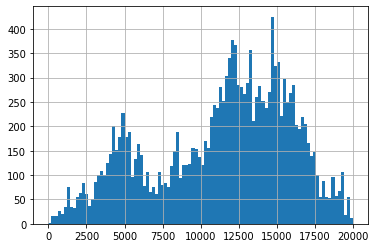

In [48]:
data['cityCenters_nearest'].hist(bins=100, range=(0,20000))

Подавляющее большинство квартир находится на расстоянии 14км от центра.

<AxesSubplot:>

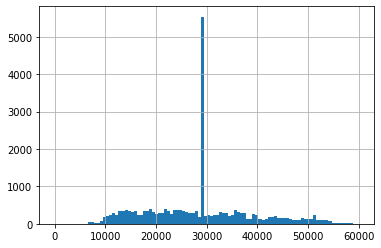

In [49]:
data['airports_nearest'].hist(bins=100, range=(0,60000))

Подавляющее большинство квартир находится на расстоянии 29км от центра.

<AxesSubplot:>

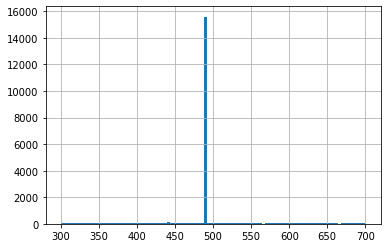

In [50]:
data['parks_nearest'].hist(bins=100, range=(300,700))

Подавляющее большинство квартир находится на расстоянии 490м от парка.

<AxesSubplot:>

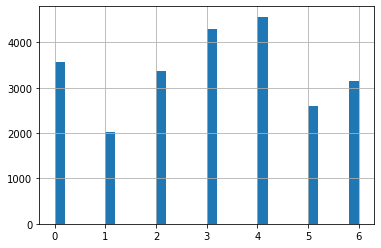

In [51]:
data['week_day'].hist(bins=30,range=(0,6))

Основные продажи происходят в будни, в выходные немного меньше.

<AxesSubplot:>

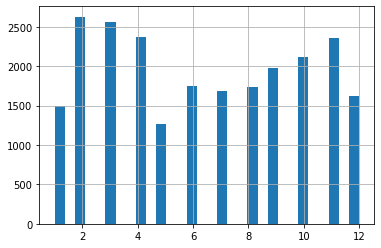

In [52]:
data['month'].hist(bins=30,range=(1,12))

Спады происходят в январе, мае и летом.

<AxesSubplot:>

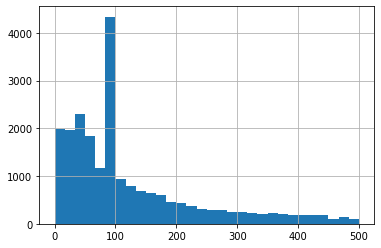

In [53]:
data['days_exposition'].hist(bins=30,range=(0,500))

ОСновные продажи осуществлялись на 95 день.

In [54]:
data['days_exposition'].describe() #Исследуем data

count    23567.000000
mean       169.092035
std        206.271016
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [55]:
current_days_exposition_date=data.query('days_exposition<420')# Убрали выбросы находящиеся за 1.5 межквартальным интервалом, добавленного к Q3

In [56]:
current_days_exposition_date['days_exposition'].describe()

count    21161.000000
mean       111.757809
std         94.761670
min          1.000000
25%         45.000000
50%         95.000000
75%        145.000000
max        419.000000
Name: days_exposition, dtype: float64

Среднее значение 111.734527, а медианное 95

Обычно продажа квартиры занимает 95 дней, но есть объекты которые продаются и за один и за срок более года. Быстрыми продажами можно считать продажи менее 45 дней, а долгими боолее 145 дней.

In [57]:
current_days_exposition_date['last_price'].describe()

count    2.116100e+04
mean     6.321146e+06
std      1.058842e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      7.630000e+08
Name: last_price, dtype: float64

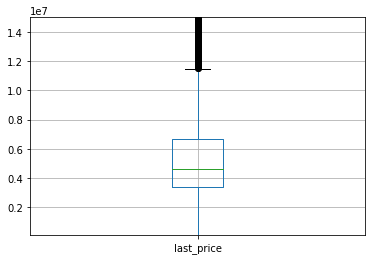

In [58]:
plt.ylim(100000,15000000)
current_days_exposition_date.boxplot(column='last_price')
plt.show()

На диаграмме размаха видно, что в выбросы попадают квартиры свыше 11 млн. руб

In [59]:
current_days_exposition_date=current_days_exposition_date.query('1000000<last_price<11*10**6') 
# Убрал выбросы квартир свыше 11 млн. руб и меньше 1 млн.

<AxesSubplot:xlabel='last_price'>

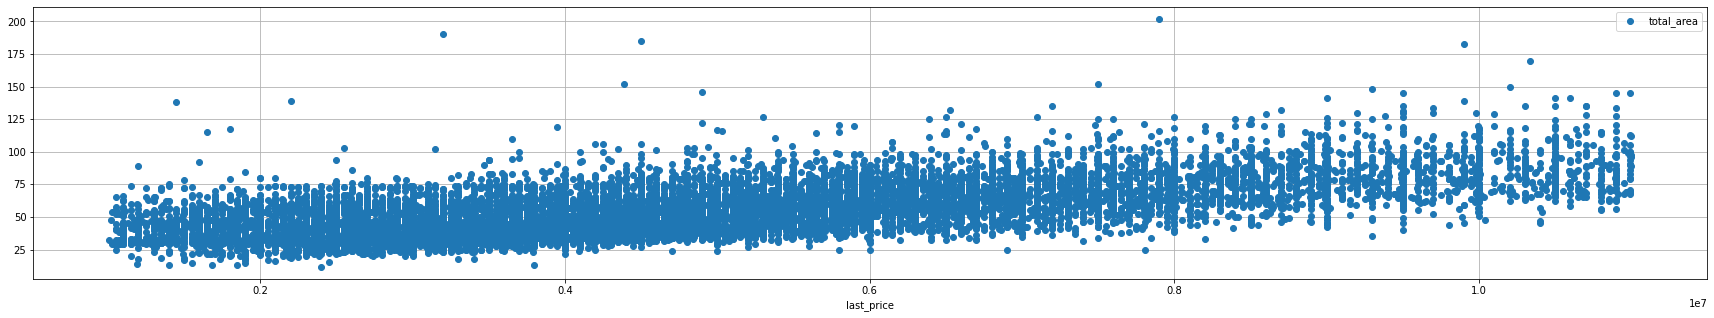

In [60]:
(current_days_exposition_date
    .sort_values(by='last_price',ascending=True)
    .plot(x='last_price',y='total_area',grid=True, style='o',figsize=(30,5))
)

In [61]:
current_days_exposition_date['last_price'].corr(current_days_exposition_date['total_area'])

0.6818673678149946

При увеличении площади, увеличивается стоимость квартиры. Полседние обекты на графике можно посчитать элитным жильем(самая большая стоимость, при уменьшении площади, но таких обьектов мало). Стоимость квартиры коррелирует с площадью на коэфф Пирсона 0.64. Значит сильно зависят эти величины друг от друга. Положительная корреляция

<AxesSubplot:xlabel='last_price'>

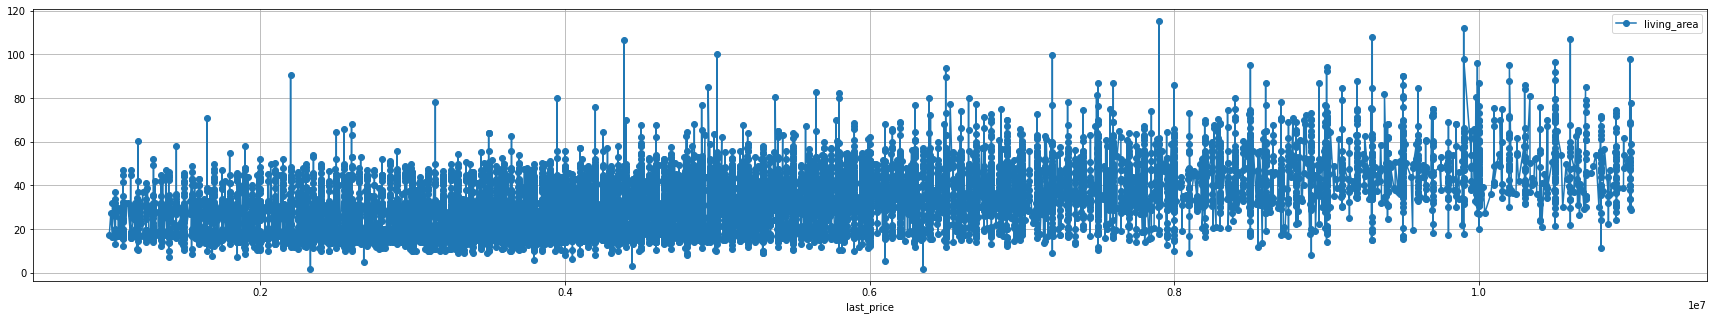

In [62]:
(current_days_exposition_date
    .sort_values(by='last_price',ascending=True)
    .plot(x='last_price',y='living_area',grid=True, style='o-',figsize=(30,5))
)

In [63]:
current_days_exposition_date['last_price'].corr(current_days_exposition_date['living_area'])

0.5677233581772274

При увеличении жилой площади, увеличивается стоимость квартиры. Стоимость квартиры коррелирует с жилой 
площадью на коэфф Пирсона 0.60. Значит сильно зависят эти величины друг от друга. Положительная корреляция

<AxesSubplot:xlabel='last_price'>

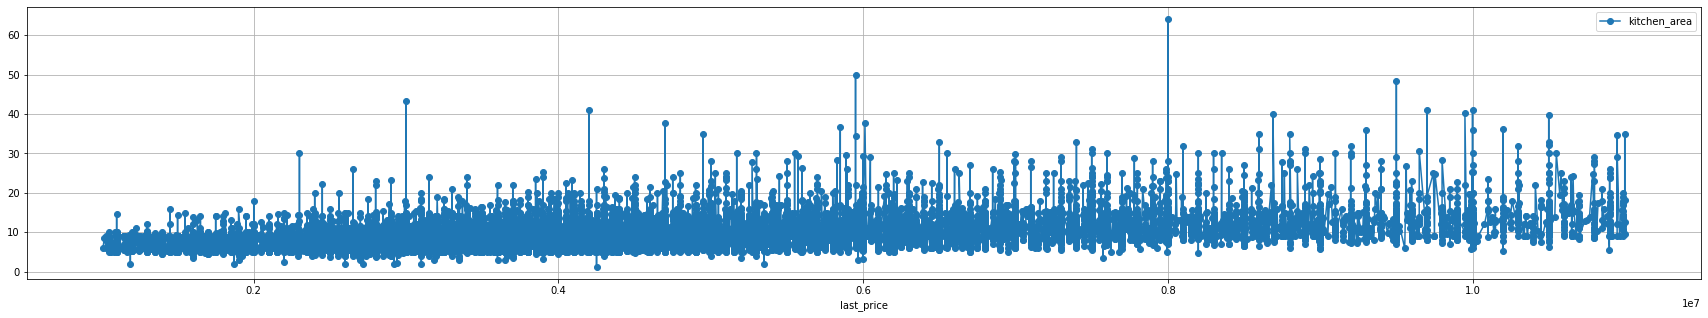

In [64]:
(current_days_exposition_date
    .sort_values(by='last_price',ascending=True)
    .plot(x='last_price',y='kitchen_area',grid=True, style='o-',figsize=(30,5))
)

In [65]:
current_days_exposition_date['last_price'].corr(current_days_exposition_date['kitchen_area'])

0.4375075480527326

При увеличении площади кухни, увеличивается стоимость квартиры. Стоимость квартиры коррелирует с площадью кухни на 
коэфф Пирсона 0.43. Не такая сильная зависимость как от общей площади и площади жилой, но все-таки
достаточно сильно зависят эти величины друг от друга. Положительная корреляция

<AxesSubplot:xlabel='rooms'>

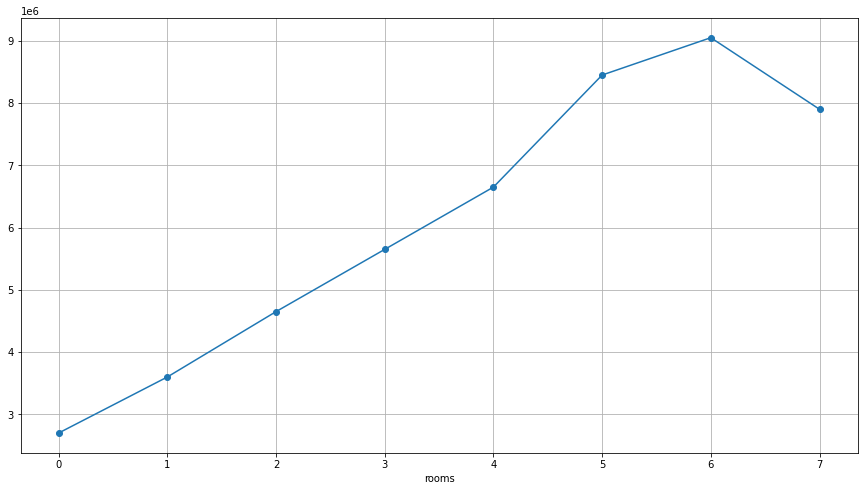

In [66]:
(current_days_exposition_date
     .groupby('rooms')['last_price'].median()
         .plot(x='rooms',y='last_price',style='o-',grid=True,figsize=(15,8),alpha=1)
)

На этом графике видно, что при увеливении кол-ва комнат, увеличивается стоимость. С кол-вом комнат 7, она ниже, так- как мало данных и значение медианной цены вносит свою корректировку.

In [67]:
current_days_exposition_date['last_price'].corr(current_days_exposition_date["rooms"])

0.44516472036045757

Коэф Пирсона 0.45. Положительная корреляция цены и кол-ва комнат

<AxesSubplot:xlabel='Floor_position'>

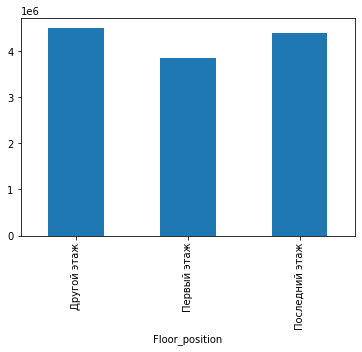

In [68]:
(current_days_exposition_date
    .groupby('Floor_position')['last_price'].median()
    .plot(x='Floor_position',y='last_price',kind='bar')
)

In [69]:
current_days_exposition_date['floor'].corr(current_days_exposition_date['last_price'])

0.13135202913611255

Из гистограммы видно, что цена не сильно зависит от этажа. Видно, что цена за первый этаж немного ниже. 
Эти выводы подтверждает коэф Пирсона= 0.11 положительный

<AxesSubplot:xlabel='week_day'>

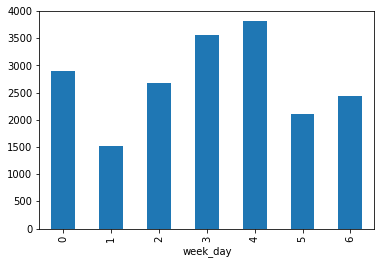

In [70]:
(current_days_exposition_date
     #.pivot_table(index='week_day',values='last_price',aggfunc=('median'))
     .groupby('week_day')['last_price'].count()
     .plot(x='week_day',y='last_price',kind='bar')
)

По гистограмме видно, что чаще всего объявления закрываются во вторник, четверг и пятницу. В выходные меньше всего. 

<AxesSubplot:xlabel='month'>

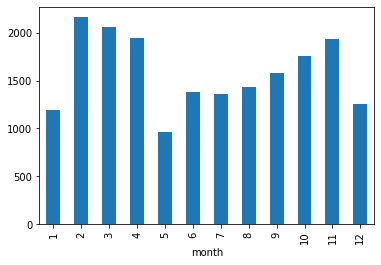

In [71]:
(current_days_exposition_date
     #.pivot_table(index='week_day',values='last_price',aggfunc=('median'))
     .groupby('month')['last_price'].count()
     .plot(x='month',y='last_price',kind='bar')
)

Из гистограммы видно, что объявления меньше всего закрываются в месяцы перед НГ в декабре и после НГ в январе. Много выходных и люди тратят деньги на подарки и отдых. В мае низко тоже из-зи праздников.

<AxesSubplot:xlabel='year'>

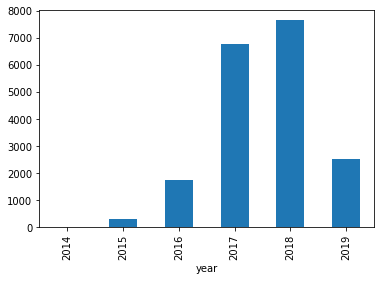

In [72]:
(current_days_exposition_date
     #.pivot_table(index='week_day',values='last_price',aggfunc=('median'))
     .groupby('year')['last_price'].count()
     .plot(x='year',y='last_price',kind='bar')
)

Больше всего продаж в 2017 и 2018 году.

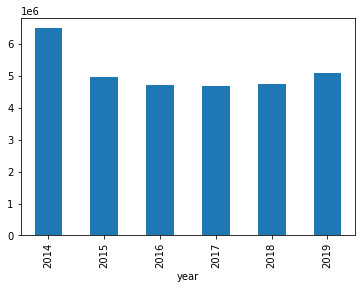

In [73]:
current_days_exposition_date.groupby('year')['last_price'].mean().plot.bar();

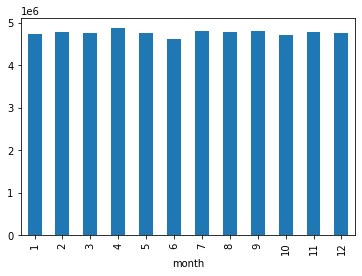

In [74]:
current_days_exposition_date.groupby('month')['last_price'].mean().plot.bar();

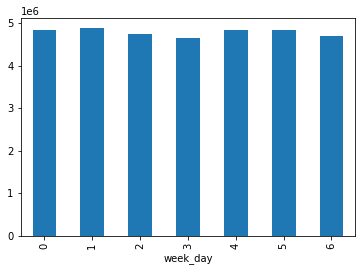

In [75]:
current_days_exposition_date.groupby('week_day')['last_price'].mean().plot.bar();

In [76]:

raiting_of_location=current_days_exposition_date.pivot_table(index='locality_name',values='price_for_m2',aggfunc=('count','median'))
raiting_of_location.sort_values(by='count',ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,12139,182222.222222
посёлок Мурино,477,168539.325843
посёлок Шушары,405,144039.735099
Всеволожск,347,123333.333333
Колпино,314,125911.775894
Пушкин,304,175068.793100
посёлок Парголово,300,191565.656566
Гатчина,269,116772.823779
деревня Кудрово,262,181382.238307


Топ 10 регионов с самым большом количеством объявлений и их средней стоимостью 1 м кв

В Санкт-Петербурге больше всего объявлений и самая большая стоимость 1 м кв

В Выборге меньше всего объявлений и самая низкая стоимость 1 м кв

In [77]:
current_days_exposition_date['cityCenters_nearest_in_km']=current_days_exposition_date['cityCenters_nearest']/1000

добавил в основную таблицу столбец с расстоянием до центра в км

In [78]:
current_days_exposition_date['cost_of_km']=current_days_exposition_date['last_price']/current_days_exposition_date['cityCenters_nearest_in_km']

Посчитал стоимость 1 кв м для всех объектом и записал в таблицу.

In [79]:
spb_region=current_days_exposition_date.query('locality_name=="Санкт-Петербург"')
spb_region.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_for_m2,Floor_position,week_day,month,year,living_area/total_area,kitchen_area/living_area,cityCenters_nearest_km,cityCenters_nearest_in_km,cost_of_km
4,2,10000000.0,100.0,2018-06-01,2,3.03,2,32.000000,13,True,...,312500.000000,Другой этаж,4,6,2018,0.320000,1.281250,8,8.098,1.234873e+06
7,5,7915000.0,71.6,2019-04-01,2,2.70,5,40.882144,22,True,...,193605.306532,Другой этаж,0,4,2019,0.570980,0.462305,11,11.634,6.803335e+05
9,18,5400000.0,61.0,2017-02-01,3,2.50,18,43.600000,7,True,...,123853.211009,Другой этаж,2,2,2017,0.714754,0.149083,15,15.008,3.598081e+05
10,5,5050000.0,39.6,2017-11-01,1,2.67,5,20.300000,3,True,...,248768.472906,Другой этаж,2,11,2017,0.512626,0.418719,13,13.878,3.638853e+05
15,16,4650000.0,39.0,2017-11-01,1,2.70,16,20.500000,5,True,...,226829.268293,Другой этаж,2,11,2017,0.525641,0.370732,14,14.259,3.261098e+05


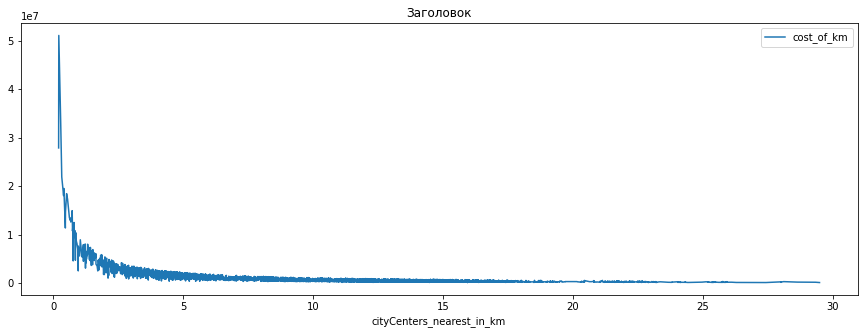

In [80]:
(spb_region
     .sort_values(by='cityCenters_nearest_in_km',ascending=True)
     .plot(x='cityCenters_nearest_in_km',y='cost_of_km', style='-',figsize=(15,5), title = 'Заголовок')
);

График зависимости цены 1 м кв от расстояния в регионе Спб. По нему видно, что после 5 км от центра цена почти не меняется и идет плотной линией.

### Общий вывод

Проведена большая работа по данному проекту.

Были определены аномалии и построена стратегия замены пропусков.
Пропуски были заполнены максимально возможными способами, чтобы каждое значение могло влиять на гипотезы.
Приведены типы данных для уменьшения используемой памяти и отображаемого вида в таблице.
Созданы дополнительные столбцы для улучшения анализа данных.
Даны ответы на заданные вопросы.

Основным ориентиром для определения стоимости квартиры - это стоимость квадратного метра.
Общая площадь, отношения жилой к общей и отношение кухонной к общей площади помогут определить самый предпочитаемый тип квартир.
Даты продаж позволят определить, в какой момент лучше продвигать рекламную компанию по продаже домов. В какие месяцы или дни недели. Количество продаж по годам имеет естественную зависимость от количество жителей города.
Этаж квартиры. В большинстве случаев люди редко берут квартиры на первм этаже из-за их небезопасности, а квартиры на последним - из-за возможных проблем с крышей. Соотвественно самыми дорогими считаются комфортные квартиры между первым и последним этажом.
